In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import default_rng
rng = default_rng(123)

In [82]:
def PP_vals(pdist, samples, alphas):
    """Return estimated vs true quantiles between pdist and samples"""
    F = pdist.cdf(np.sort(samples))
    z = [sum(F < alpha) / X_samples.shape[0] for alpha in alphas]
    return z


In [91]:
pdist = norm
X = pdist(loc=0, scale=1)
Q = pdist(loc=0, scale=2)

n_samples = 100
X_samples = np.sort(X.rvs(size=n_samples, random_state=rng))

alphas = np.linspace(0,1,100)
zx = np.stack([PP_vals(X, np.sort(X.rvs(size=n_samples, random_state=rng)), alphas) for _ in range(30)])
zx = np.stack([PP_vals(Q, np.sort(X.rvs(size=n_samples, random_state=rng)), alphas) for _ in range(30)])


Text(0, 0.5, 'Prob{PIT<alpha}')

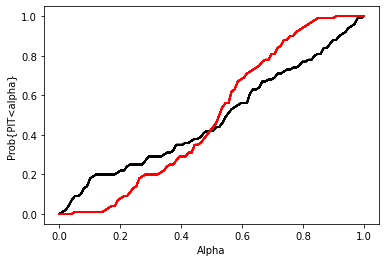

In [94]:
_ = plt.plot(alphas, zx.T, color='k', label='Target')
_ = plt.plot(alphas, zq.T, color='r', label='Estimate')
plt.xlabel('Alpha')
plt.ylabel('Prob{PIT<alpha}')
#plt.legend()


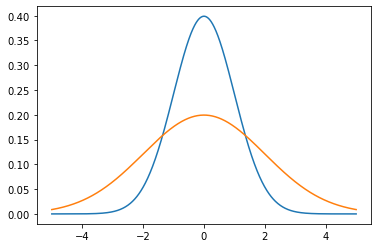

In [76]:
xs = np.linspace(-5,5,1000)
plt.plot(xs, X.pdf(xs), label='Target')
plt.plot(xs, Q.pdf(xs), label='Estimate')